# Simple regression or classification

This regression is going to be constructivistic. Meaning that I will start to get some data and then try to model.
So the first step is to take a cell, then a neighbourhood, select a species or genus whatever antd try to fit a linear model.
Plot this accordingling. 
The tools needed a new ones, if applicable would need to be in Biospytial.


In [5]:
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
from drivers.graph_models import TreeNode, Order, Family, graph, pickNode
from traversals.strategies import sumTrees, UniformRandomSampleForest

In [3]:
from traversals.strategies import sumTrees, UniformRandomSampleForest,PolygonToTrees
from mesh.models import initMesh
#polystr = 'POLYGON((-92.24837214921502948 16.53658521768252854,-92.11186028915844304 16.52849027585105901,-92.10623093410457329 16.37327180168962926,-92.25118682674197146 16.37462206197250225,-92.24837214921502948 16.53658521768252854))'
polystr = 'POLYGON((-92.54989447928841173 16.93450143453089396,-91.70267654367958698 16.9021871200489322,-91.68015912346406537 16.28717344210308937,-92.56396786692310741 16.31959139053146757,-92.54989447928841173 16.93450143453089396))'
trees = PolygonToTrees(polystr)

DEBUG Changed MESH TABLE SPACE
INFO Getting information. DEveloper! You can make this faster if you use Batchmode for py2neo.
INFO Retrieving the Tree Structures. 
 Get a coffee this will take time.


In [7]:
big_t = reduce(lambda a,b : a+b, trees)

INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging

In [11]:
from django.contrib.gis.geos import GEOSGeometry
from matplotlib import pyplot as plt
polygon = GEOSGeometry(polystr)

In [12]:
## Let's explore a bit what's here by ranking the frecuencies of nodes.

In [13]:
big_t.countNodesFrequenciesOnList(trees)

INFO Going deep 0.00398406374502
INFO Going deep 0.00398406374502
INFO Going deep 0.00398406374502
INFO Going deep 0.0677290836653
INFO Going deep 0.0159362549801
INFO Going deep 0.0756972111554
INFO Going deep 0.0358565737052
INFO Going deep 0.0358565737052
INFO Going deep 0.0517928286853
INFO Going deep 0.00398406374502
INFO Going deep 0.00796812749004
INFO Going deep 0.00796812749004
INFO Going deep 0.00398406374502
INFO Going deep 0.00398406374502
INFO Going deep 0.0358565737052
INFO Going deep 0.0836653386454
INFO Going deep 0.0278884462151
INFO Going deep 0.0278884462151
INFO Going deep 0.00796812749004
INFO Going deep 0.0159362549801
INFO Going deep 0.0239043824701
INFO Going deep 0.0756972111554
INFO Going deep 0.0756972111554
INFO Going deep 0.155378486056
INFO Going deep 0.0717131474104
INFO Going deep 0.00398406374502
INFO Going deep 0.0717131474104
INFO Going deep 0.0717131474104
INFO Going deep 0.179282868526
INFO Going deep 0.00796812749004
INFO Going deep 0.0079681274900

0.05

In [14]:
## Get Environmetal Covariates from the list of trees.
from traversals.strategies import getEnvironmentalCovariatesFromListOfTrees, getPresencesForListOfNodes, getPresencesForNode

In [58]:
## I needed to put this to restablish the connection,
from django.db import connections

In [59]:
connections.close_all()

In [19]:
rd = getEnvironmentalCovariatesFromListOfTrees(trees)
s = getPresencesForListOfNodes(big_t.phyla,trees)

In [20]:
    rd

,Elevation_mean,MaxTemperature_mean,MeanTemperature_mean,MinTemperature_mean,Precipitation_mean,SolarRadiation_mean,Vapor_mean,WindSpeed_mean
0,1773.333333,23.553241,17.550926,23.608796,117.229167,17526.541667,1.525463,2.442130
1,1543.555556,24.886111,18.689815,24.949074,129.520833,17666.847222,1.694444,2.384259
2,1207.666667,26.478472,20.293981,26.523148,142.951389,17858.405093,1.914352,2.333333
3,1074.777778,26.847222,21.025463,26.877315,149.087963,17901.733796,1.956019,2.333333
4,1080.444444,26.649537,21.000000,26.694444,151.513889,17929.439815,1.953704,2.333333
5,1039.888889,26.734722,21.231481,26.805556,156.050926,17914.009259,1.983796,2.328704
6,1292.333333,25.320370,19.988426,25.361111,155.620370,17806.203704,1.872685,2.326389
7,1557.000000,23.968889,18.672222,24.002778,146.658333,17746.672222,1.669444,2.402778
8,1572.333333,23.761111,18.534722,23.819444,146.914352,17769.273148,1.652778,2.400463
9,1018.222222,26.064120,20.835648,26.122685,161.967593,17902.539352,1.937500,2.270833


In [21]:
s

,Chordata,Mollusca,Arthropoda,Ascomycota,Marchantiophyta,Lycopodiophyta,Bryophyta,Magnoliophyta,Pteridophyta,Equisetophyta,Pinophyta
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [24]:
len(big_t.classes)

23

In [39]:
## Let's fit the model.
import statsmodels.api as sm
## Let's work only wih pines, the other are rather stupid. i.e. we should be able to find Magnoliophyta everywhere.
pines = s.Pinophyta
## For now let's use all the covariates
#logReg = sm.Logit(pines,rd)

In [41]:
logReg = sm.Logit(pines,rd)
answer = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.269490
         Iterations 8


In [42]:
answer.conf_int()

,0,1
Elevation_mean,-0.004537,0.012352
MaxTemperature_mean,-4.940198,37.417051
MeanTemperature_mean,-3.761880,1.281122
MinTemperature_mean,-36.997416,5.255145
Precipitation_mean,-0.097279,0.011772
SolarRadiation_mean,-0.002457,0.002632
Vapor_mean,0.736824,16.460901
WindSpeed_mean,-8.472976,5.079547


In [43]:
answer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Pinophyta   No. Observations:                  251
Model:                          Logit   Df Residuals:                      243
Method:                           MLE   Df Model:                            7
Date:                Tue, 25 Jul 2017   Pseudo R-squ.:                  0.2471
Time:                        19:06:01   Log-Likelihood:                -67.642
converged:                       True   LL-Null:                       -89.843
                                        LLR p-value:                 1.787e-07
========================================================================================
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Elevation_mean           0.0039      0.004      0.907      0.364        -0.005     0.012
MaxTemperature_mean     16.2384     10.806      1.503      0.133        -4.940    37.417
MeanTemperature_mean    -1.2404      1.287     -0.964      0.335        -3.762     1.281
MinTemperature_mean    -15.8711     10.779     -1.472      0.141       -36.997     5.255
Precipitation_mean      -0.0428      0.028     -1.537      0.124        -0.097     0.012
SolarRadiation_mean   8.763e-05      0.001      0.068      0.946        -0.002     0.003
Vapor_mean               8.5989      4.011      2.144      0.032         0.737    16.461
WindSpeed_mean          -1.6967      3.457     -0.491      0.624        -8.473     5.080
========================================================================================
"""

In [44]:
answer.bic

179.48763076125374

In [45]:
answer.params

Elevation_mean           0.003907
MaxTemperature_mean     16.238426
MeanTemperature_mean    -1.240379
MinTemperature_mean    -15.871135
Precipitation_mean      -0.042753
SolarRadiation_mean      0.000088
Vapor_mean               8.598862
WindSpeed_mean          -1.696714
dtype: float64

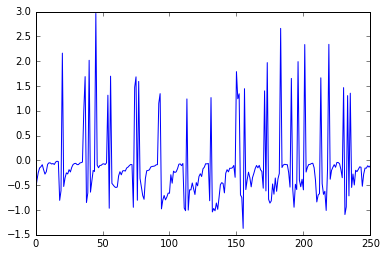

In [46]:
answer.resid_dev.plot()

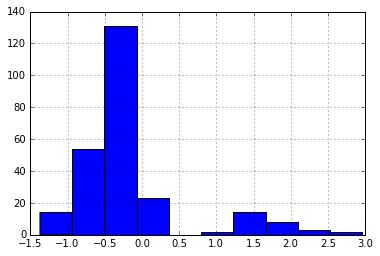

In [47]:
answer.resid_dev.hist()

## The same but for ferns

In [49]:
ferns = s.Pteridophyta
logReg = sm.Logit(ferns,rd)
answer = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.485237
         Iterations 7


In [50]:
answer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Pteridophyta   No. Observations:                  251
Model:                          Logit   Df Residuals:                      243
Method:                           MLE   Df Model:                            7
Date:                Tue, 25 Jul 2017   Pseudo R-squ.:                  0.1636
Time:                        19:06:37   Log-Likelihood:                -121.79
converged:                       True   LL-Null:                       -145.63
                                        LLR p-value:                 4.143e-08
========================================================================================
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Elevation_mean           0.0039      0.002      1.574      0.115        -0.001     0.009
MaxTemperature_mean     -2.5789      6.705     -0.385      0.701       -15.721    10.563
MeanTemperature_mean    -1.0896      0.861     -1.266      0.205        -2.776     0.597
MinTemperature_mean      3.2794      6.641      0.494      0.621        -9.737    16.296
Precipitation_mean      -0.0209      0.013     -1.582      0.114        -0.047     0.005
SolarRadiation_mean     -0.0013      0.001     -1.684      0.092        -0.003     0.000
Vapor_mean               9.0830      2.612      3.477      0.001         3.963    14.203
WindSpeed_mean           3.0006      1.892      1.586      0.113        -0.708     6.709
========================================================================================
"""

In [55]:
logReg = sm.Logit(s[['Pinophyta','Pteridophyta']],rd)
answer = logReg.fit()

ValueError: operands could not be broadcast together with shapes (251,2) (251,) 

In [53]:
s[['Pinophyta','Pteridophyta']]

,Pinophyta,Pteridophyta
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,0.0
4,0.0,1.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [60]:
rastb = big_t.associatedData.getEnvironmentalVariablesCells()

{'Elevation_mean': 1605.8766173752304,
 'MaxTemperature_mean': 24.3758914817081,
 'MeanTemperature_mean': 18.703192390634637,
 'MinTemperature_mean': 24.430606900800985,
 'Precipitation_mean': 132.45483864756636,
 'SolarRadiation_mean': 17825.724102741846,
 'Vapor_mean': 1.5962627079482443,
 'WindSpeed_mean': 2.3238505083179306}

In [64]:
import pandas as pd
alldat = pd.concat([s,rd],axis=1)

In [66]:
json_all = alldat.to_json()

In [68]:
import redis
con = redis.StrictRedis(host='redis')

In [69]:
con.set('regress_data',json_all)

True

In [70]:
con.keys()

['bursera_n_cells',
 'Beiselia',
 'ncells2',
 'regress_data',
 'Protium',
 'Bursera',
 'spatstats2017',
 'Commiphora',
 'Elaphrium',
 'Terebinthus',
 'Icica',
 'test_graph']